<a href="https://colab.research.google.com/github/Ha-eunYu/Section_Project/blob/main/Section2/S1_PC1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

from tqdm import tqdm

from sklearn.neighbors import KNeighborsRegressor  # 사용할 모델입니다.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from glob import glob
import copy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import Dataset, DataLoader, random_split
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torchvision import transforms, utils
from torchsummary import summary

device = None

if torch.cuda.is_available() :
    device = torch.device('cuda')
else : 
    device = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', device)

Using PyTorch version: 1.12.0+cu113  Device: cpu


In [3]:
data_path = './drive/MyDrive/data_v2/'

In [6]:
train_data_path = os.path.join(data_path, "train_data_v2")

In [7]:
print(train_data_path)

./drive/MyDrive/data_v2/train_data_v2


In [8]:
file_list = os.listdir(train_data_path)

In [9]:
file_list.sort()

In [11]:
# 데이터 불러오기
fn = pd.read_csv('./drive/MyDrive/data_v2/train_v2.csv')
fn.tail()

,month,file_nm
489,2019-08,201908.npy
490,2019-09,201909.npy
491,2019-10,201910.npy
492,2019-11,201911.npy
493,2019-12,201912.npy


In [17]:
def load_npy(path):
    
    npy = np.load(path)
    
    return npy

def show_data(npy):
    
    num_channel = npy.shape[-1]
    plt.figure(figsize=(3*num_channel, 5))
    for channel in range(num_channel):
        tmpimg = npy[:, :, channel]
        plt.subplot(1, num_channel, channel+1)
        plt.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()    

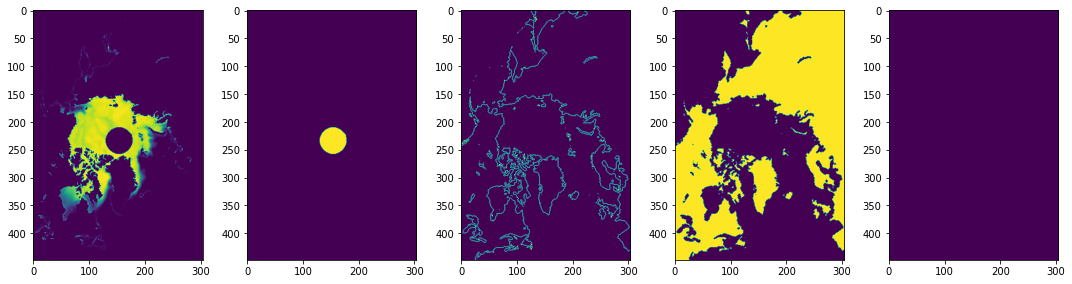

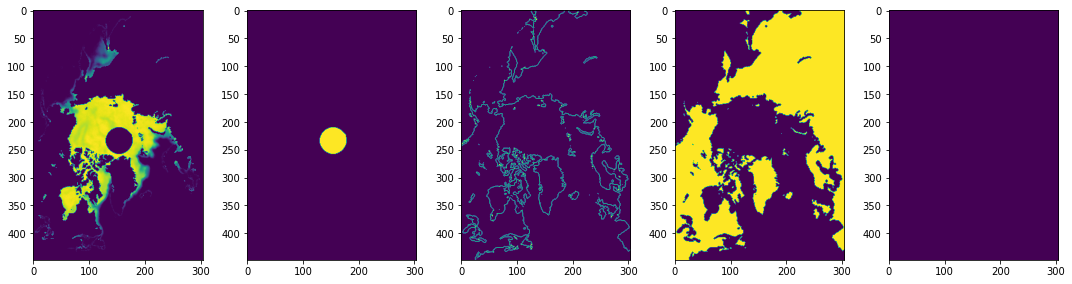

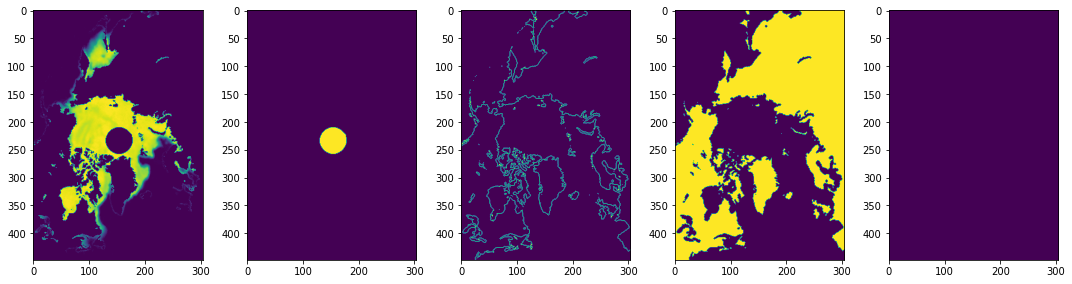

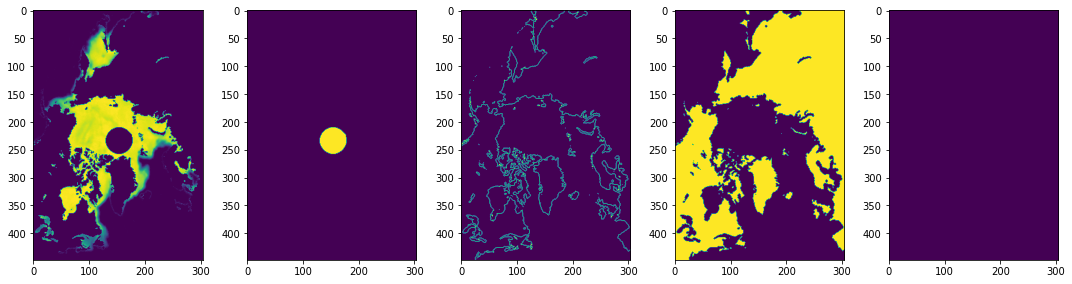

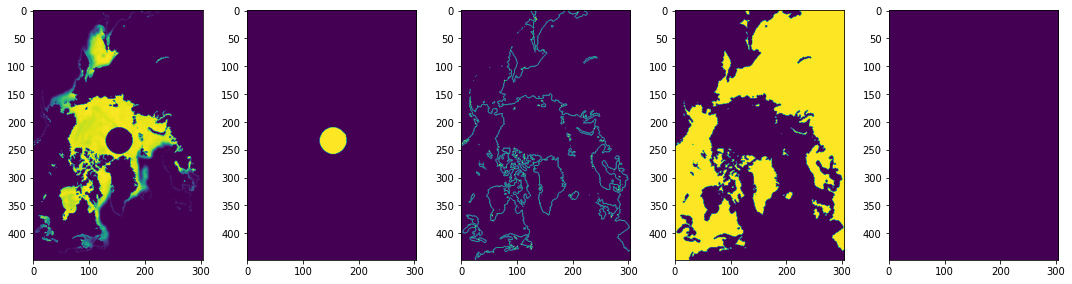

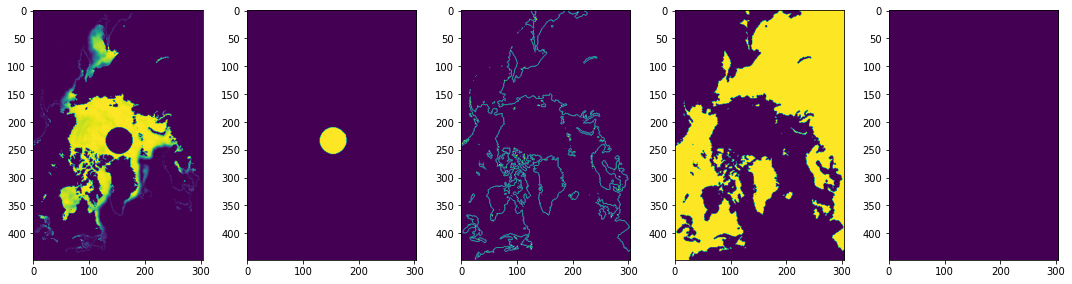

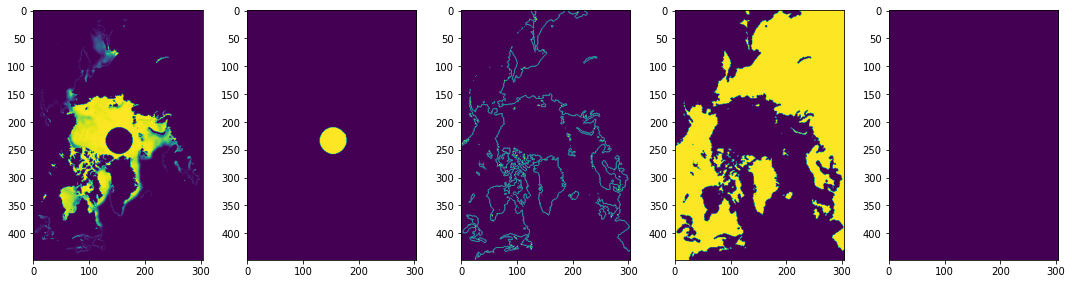

In [23]:
# 해빙 농도(0~250), 북극점(inclination 위성 관측 불가 영역), 해안선 마스크, 육지 마스크, 결측값 5개의 채널
for idx in range(fn.shape[0]):
    
    name_npy = fn['file_nm'].iloc[idx]
    tmpnpy = load_npy(path=os.path.join('./drive/MyDrive/data_v2/train_data_v2', name_npy))
    show_data(npy=tmpnpy)
    
    if(idx > 5): break

In [25]:
tmpnpy.shape

(448, 304, 5)

In [46]:
# 2000년도 데이터부터 불러옵니다.
dm = fn.iloc[255:,1]
dm.tail()

489    201908.npy
490    201909.npy
491    201910.npy
492    201911.npy
493    201912.npy
Name: file_nm, dtype: object

In [15]:
# 2000년도 이후
data = np.load('./drive/MyDrive/data_v2/train_data_v2/200001.npy')

In [27]:
data = data.reshape(1,448,304,5)

In [29]:
for i in tqdm(dm):
    a = np.load('./drive/MyDrive/data_v2/train_data_v2/'+i)
    a = a.reshape(1,448,304,5)

    data = np.concatenate((data,a), axis=0)

100%|██████████| 239/239 [02:07<00:00,  1.87it/s]


In [30]:
data.shape

(240, 448, 304, 5)

In [32]:
data = np.array(data)
data = data[:,:,:,0]

In [35]:
data.shape

(240, 448, 304)

In [36]:
data = data.reshape(240,1, 448,304)

In [37]:
# 월별로 데이터 셋 생성
for i in tqdm(range(12)):
  globals()['train{}'.format(i)] = np.array(np.concatenate((data[0+i], data[12+i], data[24+i], data[36+i], data[48+i], data[60+i], data[72+i], data[84+i], data[96+i], data[108+i], data[120+i],
                                                            data[132+i], data[144+i], data[156+i], data[168+i], data[180+i], data[192+i], data[204+i], data[216+i], data[228+i]), axis=0))

  print("\n",globals()['train{}'.format(i)].shape)  # globals()는 그 변수를 의미 - 없으면 그냥 문자열

100%|██████████| 12/12 [00:00<00:00, 211.73it/s]


 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)

 (20, 448, 304)


In [39]:
def show(npy):
    num_channel = npy.shape[0]
    plt.figure(figsize=(50, 50)) 
    for channel in range(num_channel):
      tmpimg = npy[channel, :, :]
      ax = plt.subplot(1, num_channel, channel+1)  # (행, 열, 데이터 개수) - 그리고 싶은 팜플렛 모양
      ax.title.set_text("Ice")

      ax.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

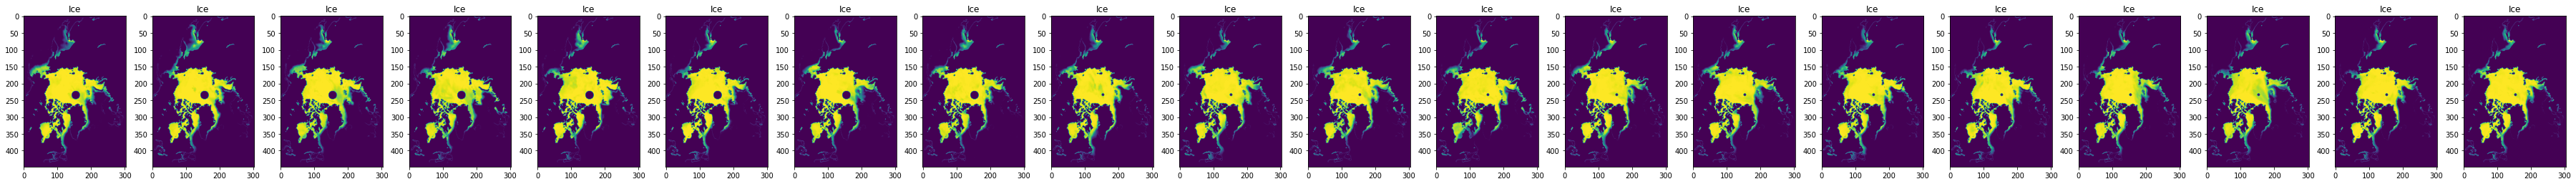

In [40]:
show(train0)

In [41]:
x_train = train10[5:17].reshape( 12,-1).T

In [42]:
y_train = train10[17].reshape(1,-1).T

In [43]:
x_test = train10[6:18].reshape( 12,-1).T

In [44]:
real = train10[18] 